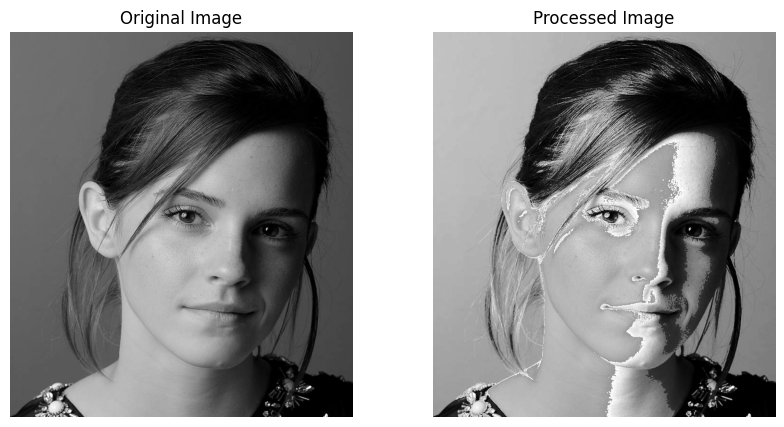

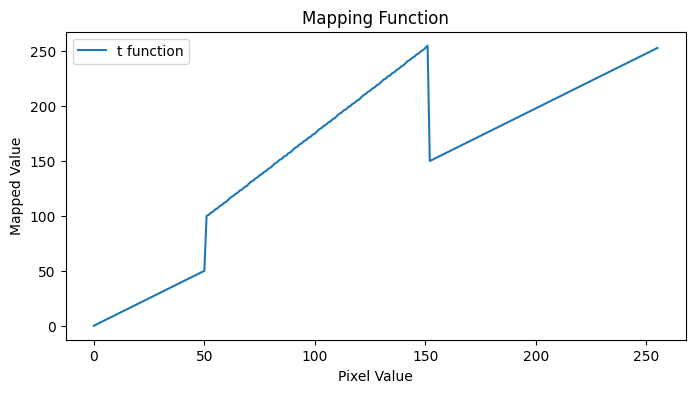

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('images\emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.linspace(0, 50, 51).astype('uint8')
t2 = np.linspace(100, 255, 101).astype('uint8')
t3 = np.linspace(150, 255, 106).astype('uint8')

transform = np.concatenate((t1, t2,t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = transform[:256].astype(np.uint8)

g = cv.LUT(f, transform)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Plot the t function
plt.figure(figsize=(8, 4))
plt.plot(np.arange(256), transform, label='t function')
plt.xlabel('Pixel Value')
plt.ylabel('Mapped Value')
plt.title('Mapping Function')
plt.legend()

plt.show()


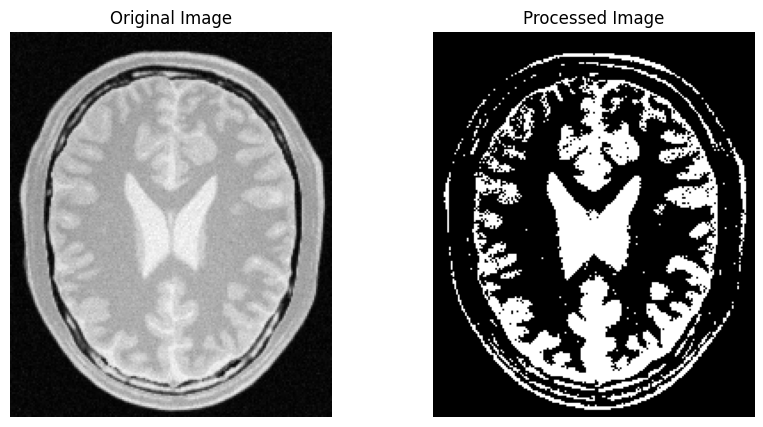

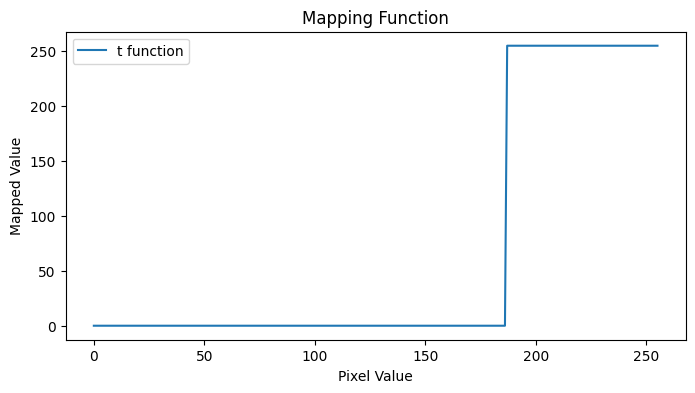

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('images\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

c = np.array([(100, 50), (150, 200)])


t1 = np.linspace(0, 0, 187).astype('uint8')
t2 = np.linspace(255,255, 70).astype('uint8')

transform = np.concatenate((t1, t2), axis=0)

# Make sure the transform array has a shape of (256,) and is of type np.uint8
transform = transform[:256].astype(np.uint8)



g = cv.LUT(f, transform)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Plot the t function
plt.figure(figsize=(8, 4))
plt.plot(np.arange(256), transform, label='t function')
plt.xlabel('Pixel Value')
plt.ylabel('Mapped Value')
plt.title('Mapping Function')
plt.legend()

plt.show()


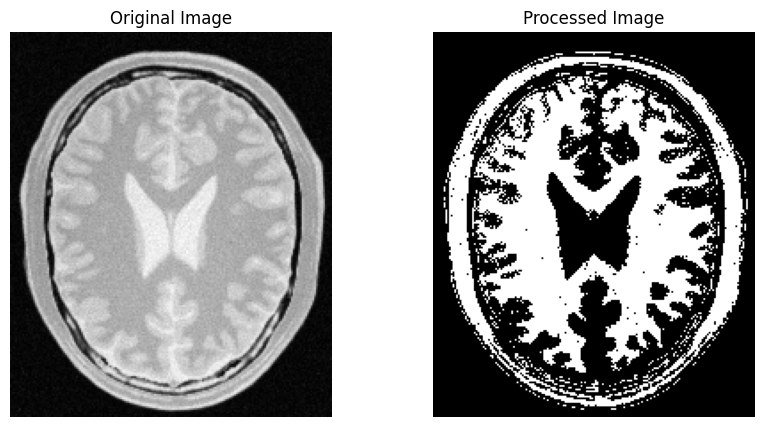

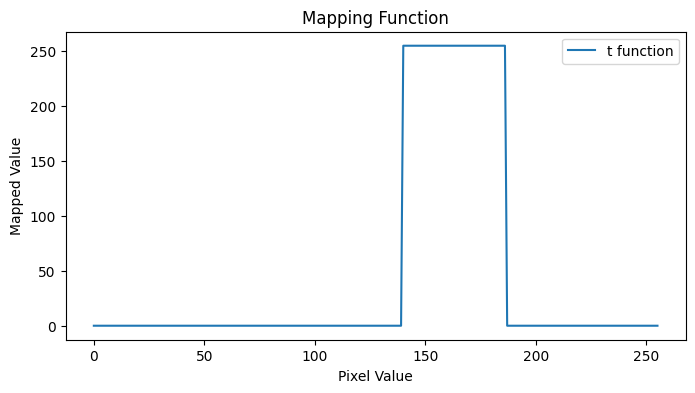

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('images\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, 0, 140).astype('uint8')
t2 = np.linspace(255, 255, 47).astype('uint8')
t3 = np.linspace(0, 0, 70).astype('uint8')

transform = np.concatenate((t1, t2), axis=0)
transform = np.concatenate((transform, t3), axis=0)

# Make sure the transform array has a shape of (256,) and is of type np.uint8
transform = transform[:256].astype(np.uint8)



g = cv.LUT(f, transform)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Plot the t function
plt.figure(figsize=(8, 4))
plt.plot(np.arange(256), transform, label='t function')
plt.xlabel('Pixel Value')
plt.ylabel('Mapped Value')
plt.title('Mapping Function')
plt.legend()

plt.show()


<Figure size 1000x1200 with 0 Axes>

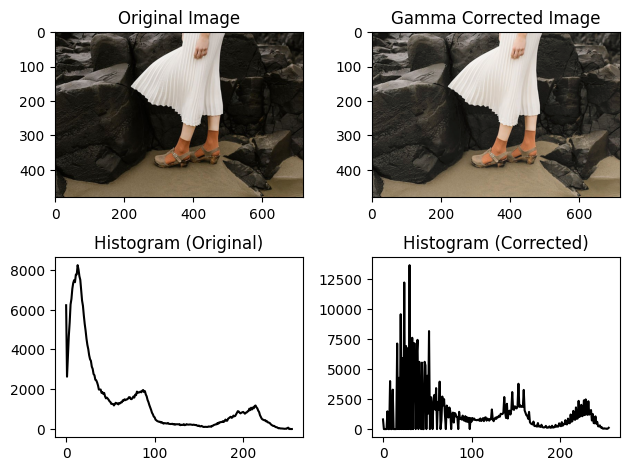

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
img_orig = cv.imread('images\highlights_and_shadows.jpg', cv.IMREAD_COLOR)

# Convert the image to the Lab color space
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)

# Extract the L channel
L_channel = img_lab[:, :, 0]

# Apply gamma correction to the L channel
gamma = 0.7
table = np.array([(i / 255.0) ** gamma * 255.0 for i in range(256)]).astype('uint8')
L_corrected = cv.LUT(L_channel, table)

# Update the L channel in the Lab image
img_lab[:, :, 0] = L_corrected


# Increase the figure size
plt.figure(figsize=(10, 12))

# Create a subplot with 2 rows and 2 columns
f, axarr = plt.subplots(2, 2)

# Display the original and gamma corrected images
axarr[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0, 1].imshow(cv.cvtColor(img_lab, cv.COLOR_LAB2RGB))

# Calculate histograms for original and corrected L channels
hist_orig = cv.calcHist([img_orig], [0], None, [256], [0, 256])
hist_corrected = cv.calcHist([img_lab], [0], None, [256], [0, 256])

# Plot histograms
axarr[1, 0].plot(hist_orig, color='k')
axarr[1, 1].plot(hist_corrected, color='k')

# Set titles for the plots
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Gamma Corrected Image')
axarr[1, 0].set_title('Histogram (Original)')
axarr[1, 1].set_title('Histogram (Corrected)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


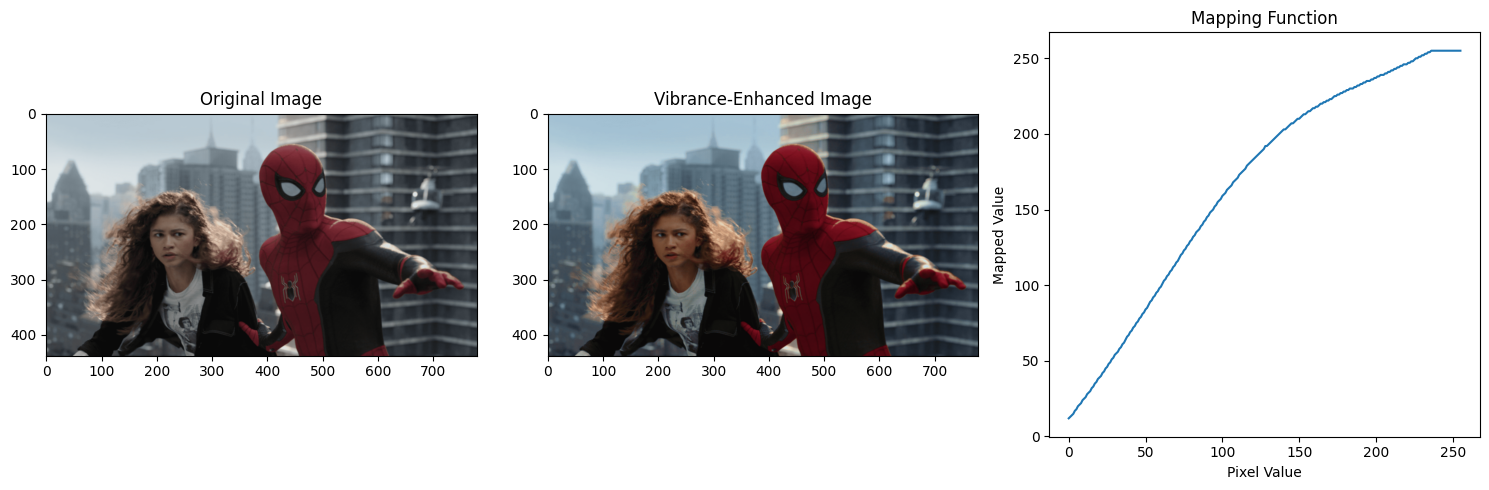

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the original image
img_orig = cv.imread('images\spider.png', cv.IMREAD_COLOR)

# Convert the image to the HSV color space
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)

# Split the HSV channels
H, S, V = cv.split(img_hsv)

# Apply the intensity transformation
a = 0.5
sigma = 70
table = np.array([min(i + (a * 128) * math.exp(-(i - 128) ** 2 / (2 * sigma ** 2)), 255) for i in range(256)]).astype('uint8')
S_transformed = cv.LUT(S, table)

# Update the S plane in the HSV image
img_hsv[:, :, 1] = S_transformed

# Create the subplots
f, axarr = plt.subplots(1, 3, figsize=(15, 5))

# Display the original, transformed, and the mapping function
axarr[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')

axarr[1].imshow(cv.cvtColor(img_hsv, cv.COLOR_HSV2RGB))
axarr[1].set_title('Vibrance-Enhanced Image')

axarr[2].plot(np.arange(256), table, label='t function')
axarr[2].set_xlabel('Pixel Value')
axarr[2].set_ylabel('Mapped Value')
axarr[2].set_title('Mapping Function')

# Adjust the layout
plt.tight_layout()
plt.show()


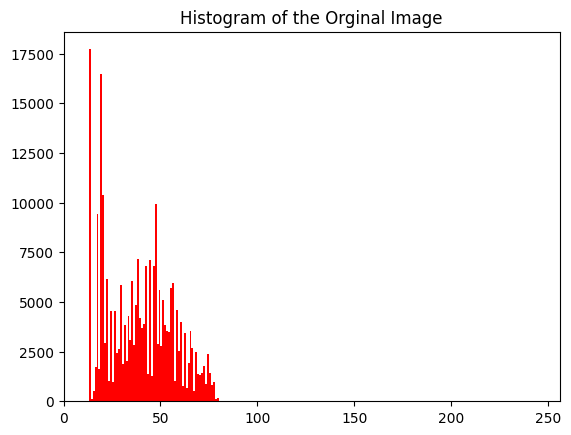

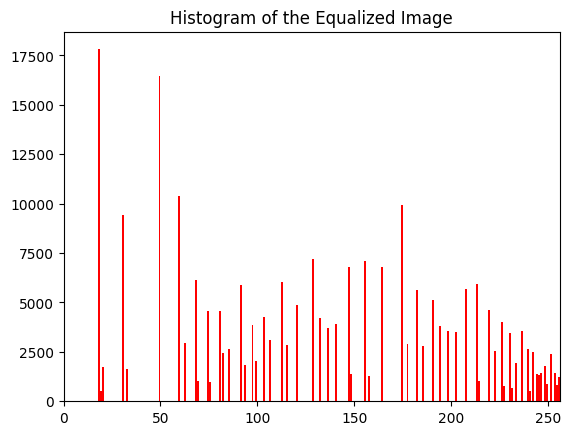

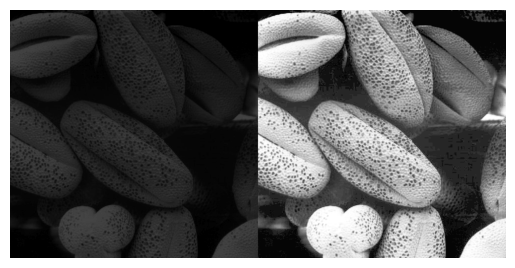

In [7]:
import numpy as np
import cv2


def equalizeHistogram(img):
    
    img_height = img.shape[0]
    img_width = img.shape[1]
    histogram = np.zeros([256], np.int32) 
    
    
    # calculate histogram 
    for i in range(0, img_height):
        for j in range(0, img_width):
            histogram[img[i, j]] +=1
            
    # calculate pdf of the image
    pdf_img = histogram / histogram.sum()
    
    ### calculate cdf 
    # cdf initialize . 
    # Why does the type np.int32?
    #cdf = np.zeros([256], np.int32)
    cdf = np.zeros([256], float)

    # For loop for cdf
    for i in range(0, 256):
        for j in range(0, i+1):
            cdf[i] += pdf_img[j]

    # You may implement the "accumulated sum" in a more efficient way:
    cdf = np.zeros(256, float)
    cdf[0] = pdf_img[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf_img[i]
     
    cdf_eq = np.round(cdf * 255, 0) # mapping, transformation function T(x)
    
    imgEqualized = np.zeros((img_height, img_width))
    
    # for mapping input image to s.
    for i in range(0, img_height):
        for j in range(0, img_width):
            r = img[i, j] # feeding intensity levels of pixels into r. 
            s = cdf_eq[r] # finding value of s by finding r'th position in the cdf_eq list.
            imgEqualized[i, j] = s # mapping s thus creating new output image.
            
    # calculate histogram equalized image here
    # imgEqualized = s # change this
    imgEqualized = np.round(imgEqualized, 0)
    imgEqualized = np.minimum(imgEqualized, 255)
    imgEqualized = np.maximum(imgEqualized, 0)
    imgEqualized = imgEqualized.astype('uint8')
    
    return imgEqualized

# end of function


# Read input image as Grayscale
img = cv2.imread('images\shells.tif', cv2.IMREAD_GRAYSCALE)

# 2.2 obtain the histogram equalized images using the above function
img_eq = equalizeHistogram(img)



# Plot the histogram of the equalized image
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.title('Histogram of the Orginal Image')
plt.show()

# Plot the histogram of the equalized image
plt.hist(img_eq.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.title('Histogram of the Equalized Image')
plt.show()

# Display the original and equalized images side by side
res = np.hstack((img,img_eq))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()

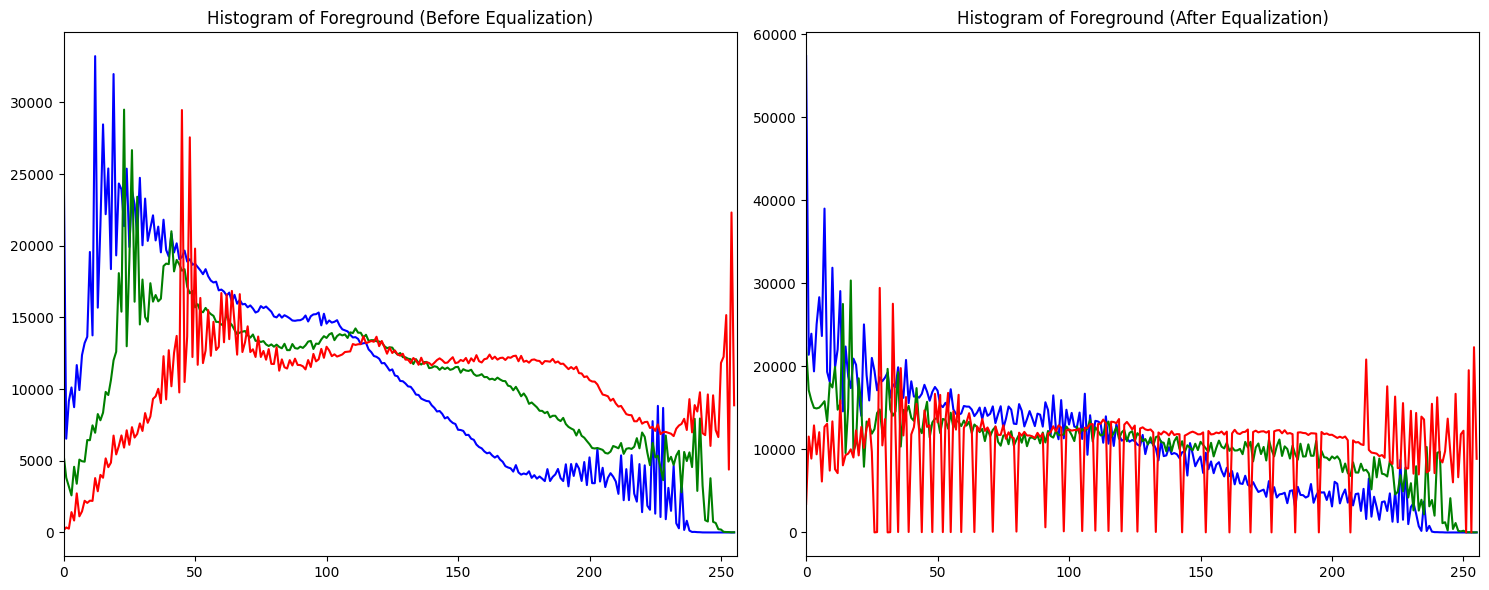

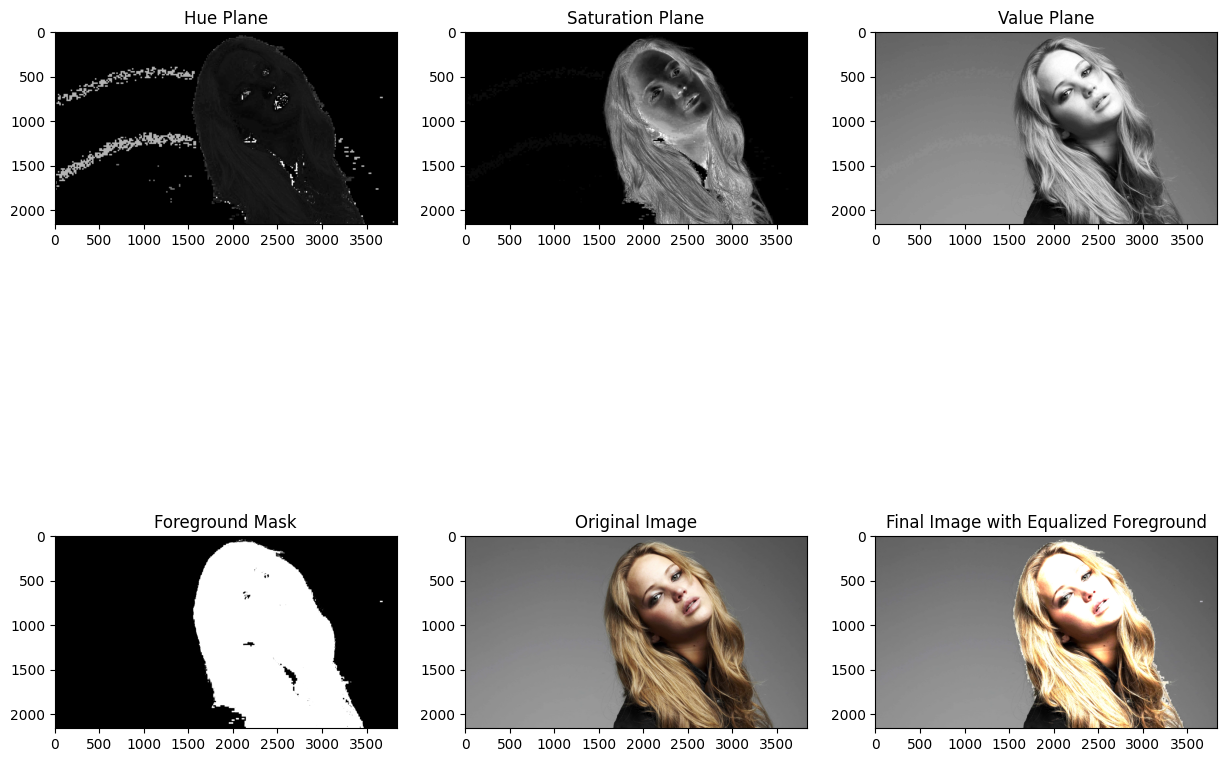

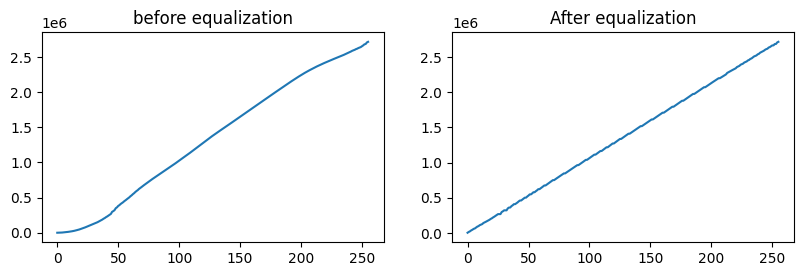

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
myimage = "images\jeniffer.jpg"
img_orig = cv2.imread(myimage)

# Convert the image to HSV color space
myimage_hsv = cv2.cvtColor(img_orig, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value planes
hue_plane, saturation_plane, value_plane = cv2.split(myimage_hsv)

# Threshold the saturation plane to obtain the foreground mask
foreground_mask = cv2.threshold(saturation_plane, 12, 255, cv2.THRESH_BINARY)[1]

# Extract the foreground using the mask
foreground = cv2.bitwise_and(img_orig, img_orig, mask=foreground_mask)

# Define color channels
color = ('b', 'g', 'r')

# Plot histograms for each color channel
plt.figure(figsize=(15, 6))
for i, c in enumerate(color):
    hist_foreground = cv2.calcHist([foreground], [i], foreground_mask, [256], [0, 256])
    plt.subplot(1, 2, 1)
    plt.plot(hist_foreground, color=c)

hist_cumsum= np.cumsum(hist_foreground)

plt.xlim([0, 256])
plt.title('Histogram of Foreground (Before Equalization)')

# Split the equalized foreground into hue, saturation, and value planes
h_plane, s_plane, v_plane = cv2.split(cv2.cvtColor(foreground, cv2.COLOR_BGR2HSV))

# Apply histogram equalization to the value plane
equ_v_plane = cv2.equalizeHist(v_plane)

# Combine the equalized value plane with the original hue and saturation planes
equ_hsv_image = cv2.merge((h_plane, s_plane, equ_v_plane))
equalized_image = cv2.cvtColor(equ_hsv_image, cv2.COLOR_HSV2BGR)

# Plot histograms for each color channel after equalization
for i, c in enumerate(color):
    hist_foreground_eq = cv2.calcHist([equalized_image], [i], foreground_mask, [256], [0, 256])
    plt.subplot(1, 2, 2)
    plt.plot(hist_foreground_eq, color=c)

plt.xlim([0, 256])
plt.title('Histogram of Foreground (After Equalization)')

plt.tight_layout()
plt.show()

# Placeholder for background_mask
background_mask = np.ones_like(foreground_mask)  # Replace this with the actual background mask

# Combine the equalized foreground and original background
result = cv2.add(cv2.bitwise_and(img_orig, img_orig, mask=background_mask), equalized_image)

# Convert the equalized HSV image back to RGB color space
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

hist_cumsum_eq = np.cumsum(hist_foreground_eq)

# Display various images and histograms
plt.figure(figsize=(15, 12))

plt.subplot(231)
plt.imshow(hue_plane, cmap='gray')
plt.title('Hue Plane')

plt.subplot(232)
plt.imshow(saturation_plane, cmap='gray')
plt.title('Saturation Plane')

plt.subplot(233)
plt.imshow(value_plane, cmap='gray')
plt.title('Value Plane')

plt.subplot(234)
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask')

plt.subplot(235)
plt.imshow(img_orig[..., ::-1])
plt.title('Original Image')

plt.subplot(236)
plt.imshow(result_rgb)
plt.title('Final Image with Equalized Foreground')

plt.figure(figsize=(15,6))
plt.subplot(231)
plt.plot(hist_cumsum)
plt.title('before equalization')

plt.subplot(232)
plt.plot(hist_cumsum_eq)
plt.title('After equalization')

plt.show()


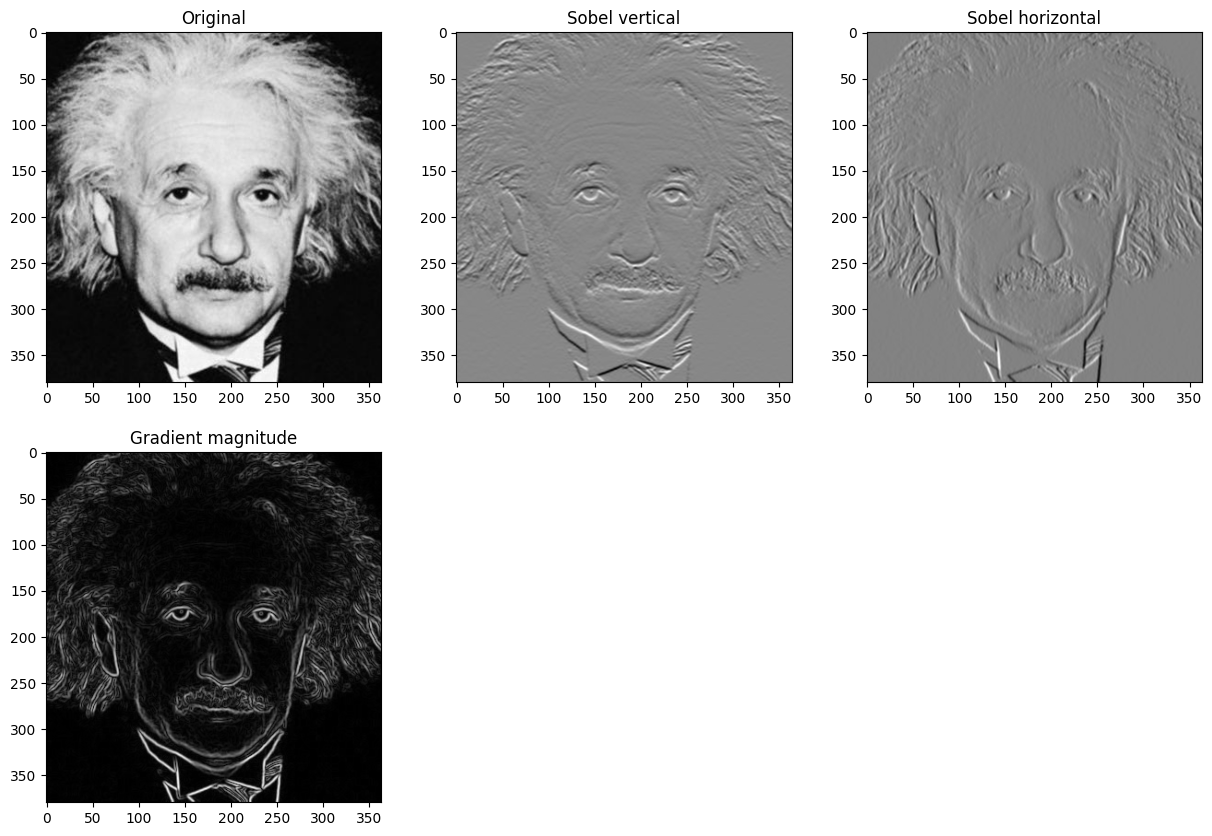

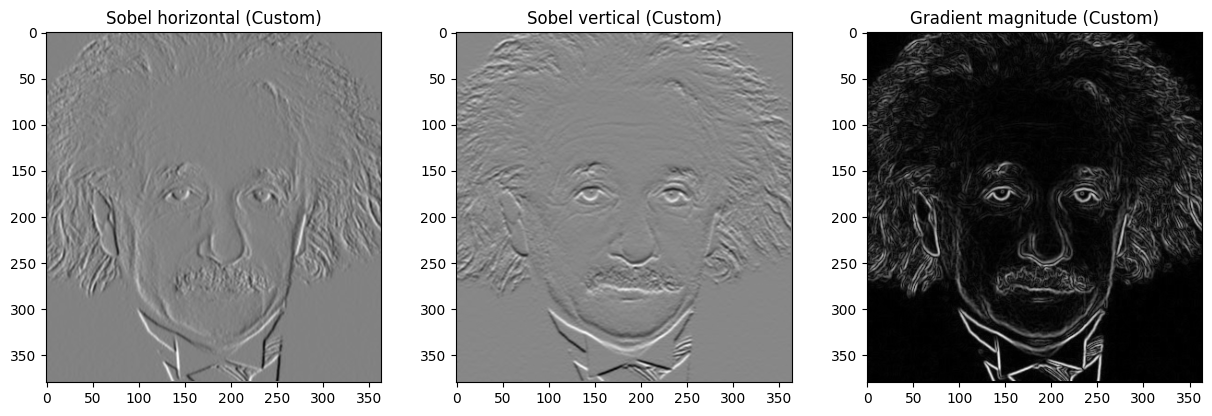

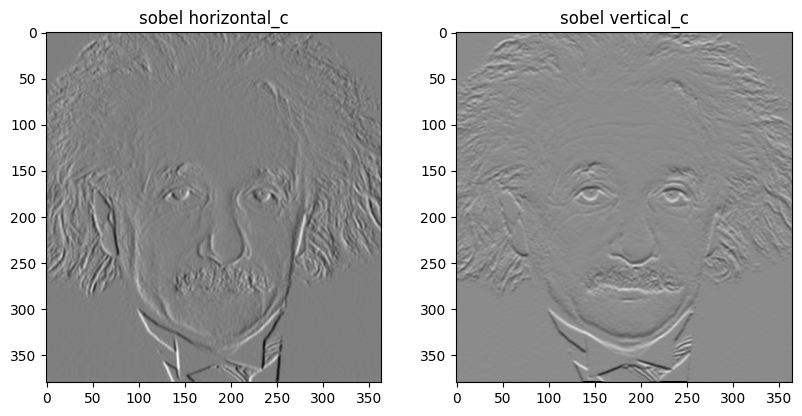

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

img = cv.imread('images\einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

img_height = img.shape[0]
img_width = img.shape[1]

kernel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float32')  
img_v = cv.filter2D(img, -1, kernel_v)

kernel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')  
img_h = cv.filter2D(img, -1, kernel_h)

img_grd = np.sqrt(img_h ** 2 + img_v ** 2)

k_h = kernel_h.shape[0] // 2
k_w = kernel_h.shape[1] // 2

img_h2 = np.zeros((img_height, img_width))
img_v2 = np.zeros((img_height, img_width))

for i in range(k_h, img_height - k_h):
    for j in range(k_w, img_width - k_w):
        img_patch = img[i - k_h:i + k_h + 1, j - k_w:j + k_w + 1]
        img_h2[i, j] = np.sum(np.multiply(kernel_h, img_patch))
        img_v2[i, j] = np.sum(np.multiply(kernel_v, img_patch))

img_grd2 = np.sqrt(img_h2 ** 2 + img_v2 ** 2)

arr_v1 = np.array([[1], [0], [-1]])
arr_v2 = np.array([[1, 2, 1]])


img_v_s = signal.convolve2d(img, arr_v1, mode="same")
img_v3 = signal.convolve2d(img_v_s, arr_v2, mode="same")


arr_h1 = np.array([[1], [2], [1]])
arr_h2 = np.array([[1, 0, -1]])

img_h_s = signal.convolve2d(img, arr_h1, mode="same")
img_h3 = signal.convolve2d(img_h_s, arr_h2, mode="same")

plt.figure(figsize=(15,10))


plt.subplot(231)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(232)
plt.imshow(img_v, cmap='gray')
plt.title("Sobel vertical")

plt.subplot(233)
plt.imshow(img_h, cmap='gray')
plt.title("Sobel horizontal")

plt.subplot(234)
plt.imshow(img_grd, cmap='gray')
plt.title("Gradient magnitude")

plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(img_h2, cmap='gray')
plt.title("Sobel horizontal (Custom)")

plt.subplot(232)
plt.imshow(img_v2, cmap='gray')
plt.title("Sobel vertical (Custom)")

plt.subplot(233)
plt.imshow(img_grd2, cmap='gray')
plt.title("Gradient magnitude (Custom)")



plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(img_h3, cmap='gray')
plt.title("sobel horizontal_c")

plt.subplot(232)
plt.imshow(img_v3, cmap='gray')
plt.title("sobel vertical_c")



plt.show()


orginal image1:  (270, 480, 3)
zoomed nearest2:  (1080, 1920, 3)
zoomed bilinear2:  (1080, 1920, 3)
Normalized SSD for Nearest-Neighbor Interpolation: 40.18347736625515
Normalized SSD for Bilinear Interpolation: 39.32977446630658

orginal image2:  (300, 480, 3)
zoomed nearest2:  (1200, 1920, 3)
zoomed bilinear2:  (1200, 1920, 3)
Normalized SSD for Nearest-Neighbor Interpolation: 16.926062210648148
Normalized SSD for Bilinear Interpolation: 16.345512297453702


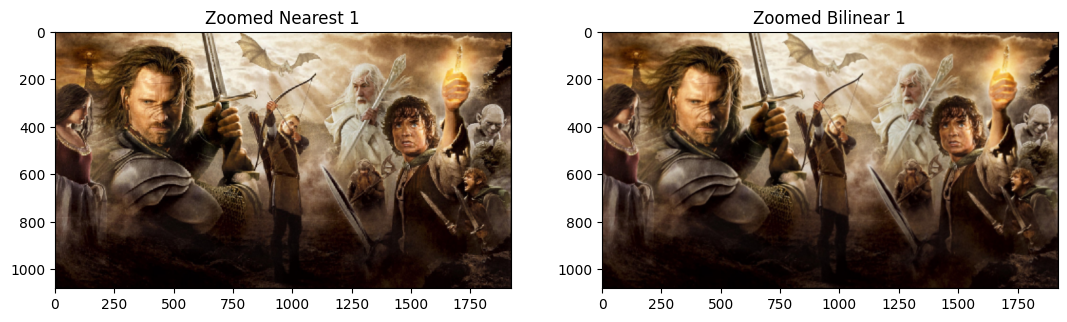

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math


scale = 4

def nearest_neighbor_zoom(img, scale):
    rows = int(scale * img.shape[0])
    columns = int(scale * img.shape[1])
    zoomed_img = np.zeros((rows, columns, 3), dtype=img.dtype)
    for i in range(0, rows - 1):
            for j in range(0, columns - 1):
                x = i / scale
                y = j / scale
                img_x_pos = round(x) if (x <= img.shape[0] - 1) else int(x)
                img_y_pos = round(y) if (y <= img.shape[1] - 1) else int(y)
                zoomed_img[i, j] = img[round(img_x_pos), round(img_y_pos)]
    return zoomed_img
   
        
def bilinear_interpolation_zoom(img,scale):
    rows = int(scale * img.shape[0])
    columns = int(scale * img.shape[1])
    zoomed_img = np.zeros((rows, columns, 3), dtype=img.dtype)
    for i in range(0, rows - 1):
            for j in range(0, columns - 1):
                x, y = i / scale, j / scale
                x_left = math.floor(x)
                x_right = math.ceil(x) if (x <= img.shape[0] - 1) else math.floor(x)
                y_top = math.floor(y)
                y_bottom = math.ceil(y) if (y <= img.shape[1] - 1) else math.floor(y)
                r_y = (y - y_top)
                r_x = (x - x_left)
                for channel in range(3):
                    zoomed_img[i, j, channel] = math.floor(
                        (img[x_left, y_top, channel] * (1 - r_y) + img[x_left, y_bottom, channel] * (r_y)) * (1 - r_x)
                        + (img[x_right, y_top, channel] * (1 - r_y) + img[x_right, y_bottom, channel] * (r_y)) * (r_x))

    return zoomed_img

def compute_ssd(original_img, zoomed_img):
    return np.square(original_img - zoomed_img).sum() / (original_img.shape[0] * original_img.shape[1] * original_img.shape[2])

# Load the original and zoomed-out images
orginal_small_1 = cv2.imread("images\im01small.png")
zoomed_small_1= cv2.imread("images\im01.png")
scale_factor = 4

# Perform zooming using both interpolation methods
zoomed_nearest_1 = nearest_neighbor_zoom(orginal_small_1, scale_factor)
zoomed_bilinear_1 = bilinear_interpolation_zoom(orginal_small_1, scale_factor)

ssd_nearest_1=compute_ssd(zoomed_small_1, zoomed_nearest_1)
ssd_bilinear_1 = compute_ssd(zoomed_small_1, zoomed_bilinear_1)

print("orginal image1: ",orginal_small_1.shape)
print("zoomed nearest2: ",zoomed_nearest_1.shape)
print("zoomed bilinear2: ",zoomed_bilinear_1.shape)

print("Normalized SSD for Nearest-Neighbor Interpolation:", ssd_nearest_1)
print("Normalized SSD for Bilinear Interpolation:", ssd_bilinear_1)

print()

cv2.imshow('Original Small', orginal_small_1)
cv2.imshow('Zoomed Nearest', zoomed_nearest_1)
cv2.imshow('Zoomed Bilinear', zoomed_bilinear_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

zoomed_small_2 = cv2.imread("images\im02.png")
orginal_small_2= cv2.imread("images\im02small.png")
scale_factor = 4

# Perform zooming using both interpolation methods
zoomed_nearest_2 = nearest_neighbor_zoom(orginal_small_2, scale_factor)
zoomed_bilinear_2 = bilinear_interpolation_zoom(orginal_small_2, scale_factor)

ssd_nearest_2=compute_ssd(zoomed_small_2, zoomed_nearest_2)
ssd_bilinear_2 = compute_ssd(zoomed_small_2, zoomed_bilinear_2)

print("orginal image2: ",orginal_small_2.shape)
print("zoomed nearest2: ",zoomed_nearest_2.shape)
print("zoomed bilinear2: ",zoomed_bilinear_2.shape)

print("Normalized SSD for Nearest-Neighbor Interpolation:", ssd_nearest_2)
print("Normalized SSD for Bilinear Interpolation:", ssd_bilinear_2)



cv2.imshow('Original Small', orginal_small_2)
cv2.imshow('Zoomed Nearest', zoomed_nearest_2)
cv2.imshow('Zoomed Bilinear', zoomed_bilinear_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(20, 10))

plt.subplot(232)
plt.imshow(cv2.cvtColor(zoomed_nearest_1, cv2.COLOR_BGR2RGB))
plt.title('Zoomed Nearest 1')

plt.subplot(233)
plt.imshow(cv2.cvtColor(zoomed_bilinear_1, cv2.COLOR_BGR2RGB))
plt.title('Zoomed Bilinear 1')

plt.show()


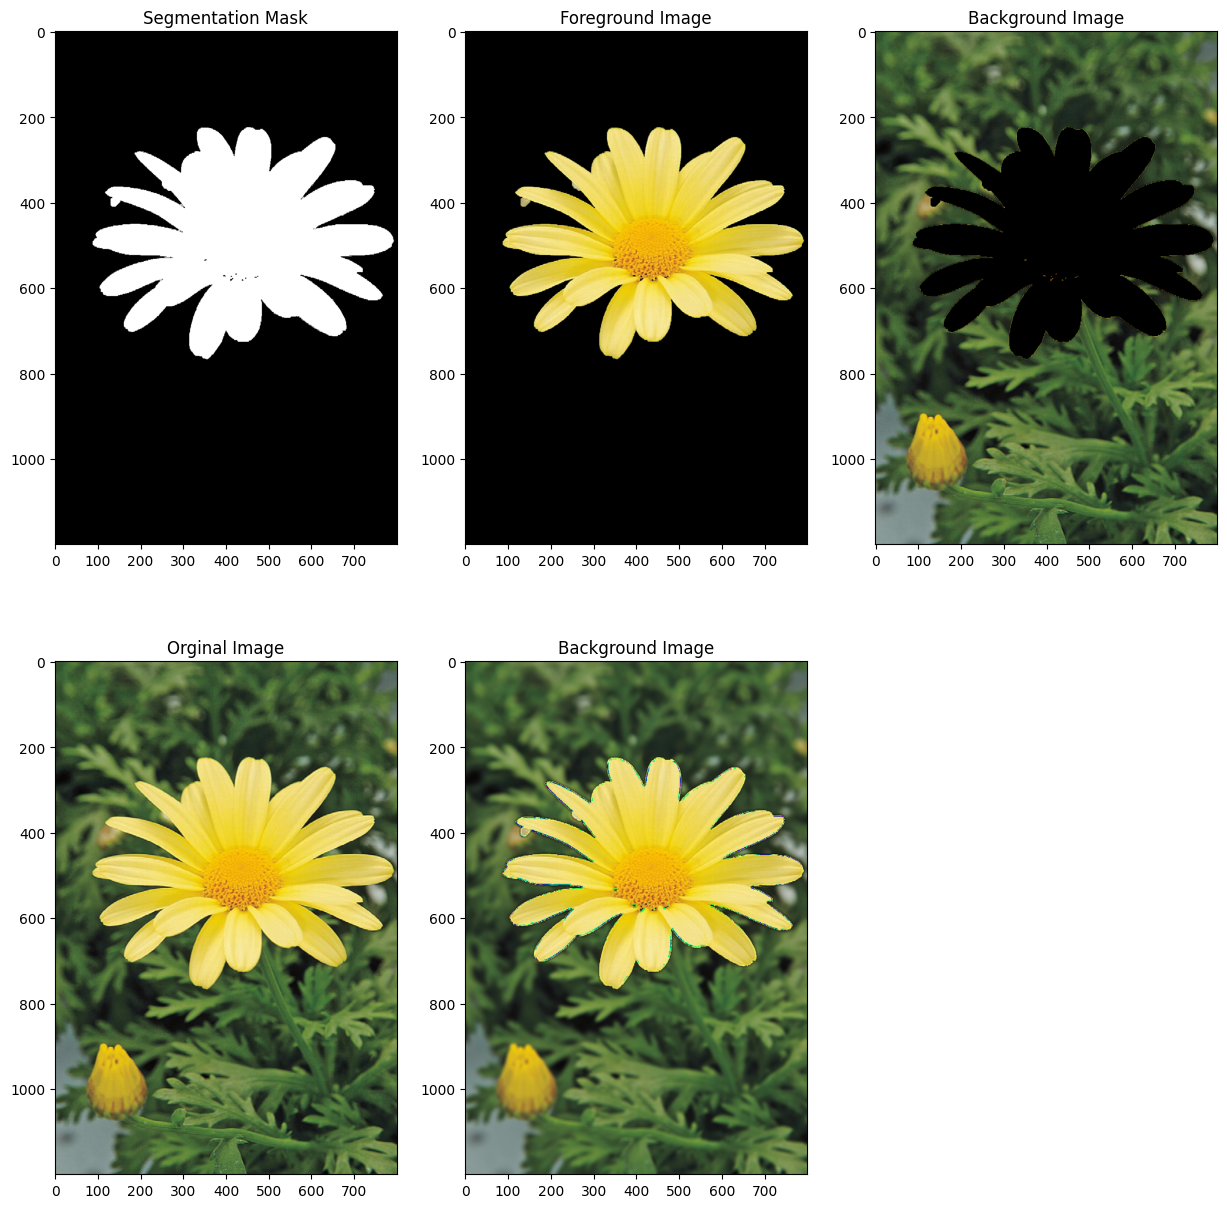

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('images\sun flower.jpeg')

# Initialize a mask
mask = np.zeros(image.shape[:2], np.uint8)

# Create rectangles to define foreground and background areas
rect = (0, 200, 800, 600)   #x,y,w,h

# Apply GrabCut algorithm
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 8, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image
segmented_image = image * mask2[:, :, np.newaxis]

background_image= image - segmented_image

#Apply average blurring to the background
blurred_background = cv.blur(background_image, (9,9))

final_image=segmented_image + blurred_background

# Show results
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.imshow(cv2.cvtColor(mask2 * 255, cv2.COLOR_GRAY2RGB))
plt.title('Segmentation Mask')

plt.subplot(232)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Foreground Image')

plt.subplot(233)
plt.imshow(cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB))
plt.title('Background Image')

plt.subplot(234)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orginal Image')

plt.subplot(235)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image')

plt.show()
